Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

_____

Reading Data

In [2]:
%%time
df = pd.read_csv('Google-Playstore.csv')

Wall time: 9.72 s


In [3]:
df['count'] = 1

Top four category based on number of apps

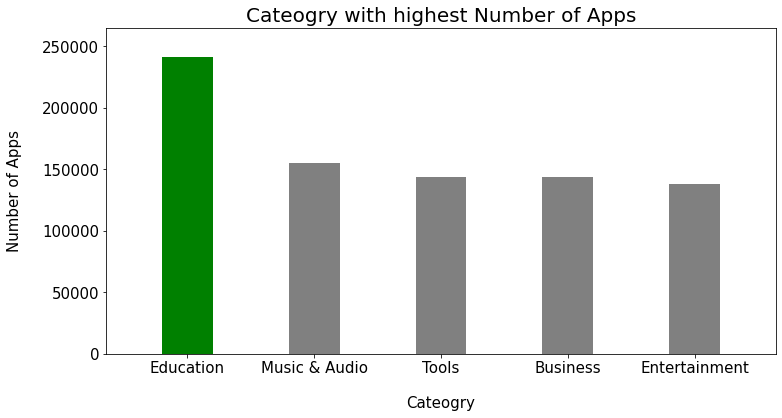

In [4]:
# top 4 cateogry based on number of apps exist
y = 5
apps_of_category = df.groupby('Category').count()['count'].sort_values(ascending=False)
x_values = list(apps_of_category.index[0:y])
y_values = list(apps_of_category[0:y])
# plt.rcParams["font.family"] = "Poppins"
plt.figure(figsize=(12,6))
clrs = ['grey' if (x < max(y_values)) else 'green' for x in y_values]
plt.bar(x_values, y_values, linewidth=15, width = 0.4, color=clrs)
plt.title('Cateogry with highest Number of Apps', fontsize=20)
plt.xlabel('Cateogry', fontsize=15, labelpad=20)
plt.ylabel('Number of Apps', fontsize=15, labelpad=20)
plt.tick_params('both', labelsize=15, labelcolor='black')
plt.margins(x=0.1, y=0.1, tight=True)
plt.savefig('top_category.jpg', dpi=200)

_____

Number 1 app based on downloads

In [5]:
# remove na values from install
top_downloaded_apps = df[df['Installs'].isna() == False].sort_values('Installs', ascending=False)
# indexing to find rank of app
top_downloaded_apps.reset_index(inplace=True)
# remove special character from installs column
top_downloaded_apps['Installs'] = top_downloaded_apps['Installs'].str.replace('\+|,', '').apply(pd.to_numeric)
# sorting apps from installs
top_downloaded_apps = top_downloaded_apps.sort_values('Installs', ascending=False)

<ipython-input-5-952191c52189>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  top_downloaded_apps['Installs'] = top_downloaded_apps['Installs'].str.replace('\+|,', '').apply(pd.to_numeric)


In [6]:
# printing the first app based on number of downloads
top_downloaded_apps.iloc[:1,:]

,index,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,count
1240950,2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,10000000000,1.000000e+10,12057627016,True,...,apps-help@google.com,"May 24, 2012","Jun 10, 2021",Everyone,http://www.google.com/policies/privacy,False,False,False,2021-06-16 10:41:26,1


In [7]:
top_downloaded_apps[top_downloaded_apps['App Name'] == 'Calculator'].iloc[0]

index                                               1702634
App Name                                         Calculator
App Id                        com.google.android.calculator
Category                                              Tools
Rating                                                  4.4
Rating Count                                       354298.0
Installs                                         1000000000
Minimum Installs                               1000000000.0
Maximum Installs                                 1005908944
Free                                                   True
Price                                                   0.0
Currency                                                USD
Size                                                   2.6M
Minimum Android                                  6.0 and up
Developer Id                                     Google LLC
Developer Website                    http://www.google.com/
Developer Email      android-calculator-

____

Most Expensive App

In [8]:
# Sorting based on Price
df.sort_values('Price', ascending=False).iloc[:1,:]

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time,count
544468,MESH Connect,com.tecit.android.bluepiano.meshconnectfull,Productivity,0.0,0.0,10+,10.0,25,False,400.0,...,support@go-evo.com,"Sep 7, 2017","Sep 07, 2017",Everyone,http://www.go-evo.com/privacy,False,False,False,2021-06-16 05:15:22,1


______

The most oldest App

In [9]:
df['Released Year'] = df['Released'].str[-4:].apply(pd.to_numeric)
df['Released Date'] = df['Released'].str[-8:-6].apply(pd.to_numeric)
oldest_apps = df[(df['Released Year'].isna() == False) & (df['Released Date'].isna() == False)]

In [10]:
# sorting apps from installs
oldest_apps = oldest_apps.sort_values('Released Year', ascending=True)

In [11]:
# taking only first year of uploaded apps and first month
_2010_apps = oldest_apps[(oldest_apps['Released Year'] == oldest_apps['Released Year'].iloc[0]) 
                         & 
                         (oldest_apps['Released'].str.contains('Jan'))].sort_values('Released Date', ascending =True)

In [12]:
_2010_apps.iloc[0]

App Name                  TweetCaster Pro for Twitter
App Id               com.handmark.tweetcaster.premium
Category                                       Social
Rating                                            3.9
Rating Count                                  24284.0
Installs                                     100,000+
Minimum Installs                             100000.0
Maximum Installs                               102129
Free                                            False
Price                                            4.99
Currency                                          USD
Size                                              12M
Minimum Android                            6.0 and up
Developer Id                           OneLouder Apps
Developer Website           http://www.onelouder.com/
Developer Email                 support@onelouder.com
Released                                 Jan 28, 2010
Last Updated                             Mar 02, 2021
Content Rating              

_____

Ratio of Add supported and non Add supported Apps

In [13]:
Add_supported = df[df['Ad Supported'] == True].count()['count']
Non_Add_supported = df[df['Ad Supported'] == False].count()['count']
total_sum = Add_supported + Non_Add_supported

In [14]:
Ratio_supported = round((Add_supported/total_sum)*100,2)
Ratio_Non_supported = round((Non_Add_supported/total_sum)*100,2)

# They exist with equal ratios
print('The Add-suported apps ratio is', Ratio_supported, '\n', 'The Non Add-suported apps ratio is', Ratio_Non_supported)

The Add-suported apps ratio is 49.75 
 The Non Add-suported apps ratio is 50.25


_____

Ratings analysis

In [15]:
x_values = list(df.groupby("Rating").count()['count'].index)
y_values = list(df.groupby("Rating").count()['count'].values)

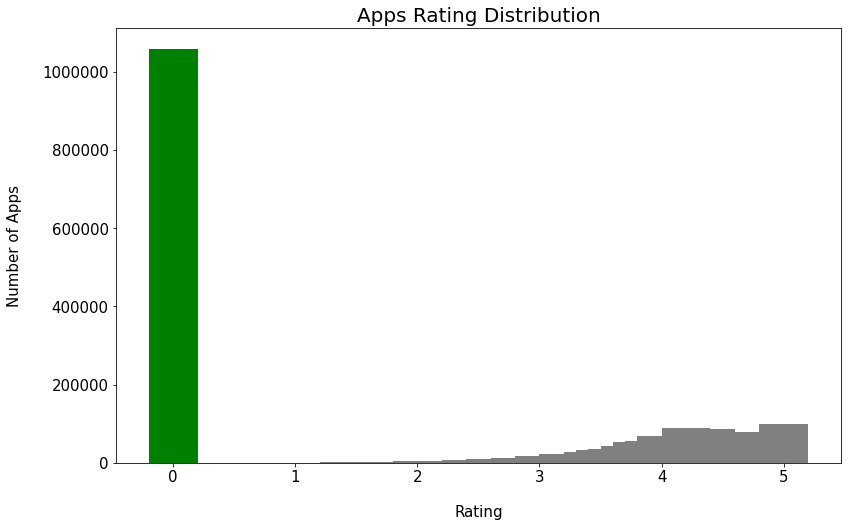

In [16]:
plt.figure(figsize=(13,8))
clrs = ['grey' if (x < max(y_values)) else 'green' for x in y_values ]
plt.bar(x_values, y_values, linewidth=15, width = 0.4, color=clrs)
plt.title('Apps Rating Distribution', fontsize=20)
plt.xlabel('Rating', fontsize=15, labelpad=20)
plt.ylabel('Number of Apps', fontsize=15, labelpad=20)
plt.tick_params('both', labelsize=15, labelcolor='black')
plt.ticklabel_format(useOffset=False, style='plain')
plt.savefig('Rating_count.jpg', dpi=200)

Shooting games list

In [17]:
df_action = df[df['Category'] == 'Action']

In [18]:
df_action[df_action['App Name'].str.lower().str.contains('war|action|fight|shoot|kill|crime')].sort_values('Installs', ascending=False).iloc[0]

App Name                  Sniper 3D: Fun Free Online FPS Shooting Game
App Id                                           com.fungames.sniper3d
Category                                                        Action
Rating                                                             4.4
Rating Count                                                 1285629.0
Installs                                                  500,000,000+
Minimum Installs                                           500000000.0
Maximum Installs                                             518325903
Free                                                              True
Price                                                              0.0
Currency                                                           USD
Size                                                              136M
Minimum Android                                             4.4 and up
Developer Id                                        Fun Games For Free
Develo

____

Each Category separate DataFrame

In [19]:
d = {index: label for index, label in df.groupby('Category')}

____

Rating Analysis of category

In [20]:
values = []
keys=[]
for key in d:
    values.append(round(d[key]['Rating'].mean(),2))
    keys.append(key)
#     print(key, ' Category has average rating of', round(d[key]['Rating'].mean(),2), '\n')
data = {'Category': keys, 'Average Rating': values}

In [21]:
tester = pd.DataFrame(data=data)

In [22]:
tester['Average Rating'].count()

48

In [23]:
tester[tester['Average Rating'] < 3].count()

Category          43
Average Rating    43
dtype: int64

____

Average rating of google play store

In [24]:
df_as = df[df['Rating'].isna() == False]['Rating']

In [25]:
df_as.mean()

2.2031515317710064

_______

Smallest and largest size of app on playstore

In [26]:
df_size_app_data = df[df['Size'].isna() == False]

In [27]:
df_size_of_app = df_size_app_data.sort_values('Size', ascending=False)

In [28]:
df_size_measure = df_size_of_app[(df_size_of_app['Size'].str.contains('[0-9]')) & 
                                 (df_size_of_app['Size'].str.contains('k|K'))]

In [29]:
df_size_measure['size_new_1'] = df_size_measure['Size'].str.replace('k', '')
df_size_measure['size_new_2'] = df_size_measure['size_new_1'].str.replace(',', '').apply(pd.to_numeric)

<ipython-input-29-21fd453aa4ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size_measure['size_new_1'] = df_size_measure['Size'].str.replace('k', '')
<ipython-input-29-21fd453aa4ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size_measure['size_new_2'] = df_size_measure['size_new_1'].str.replace(',', '').apply(pd.to_numeric)


In [30]:
print('The smallest size of an app is ',df_size_measure.iloc[0].Size)

The smallest size of an app is  99k


In [31]:
df_size_of_app = df_size_app_data.sort_values('Size', ascending=True)
df_size_measure = df_size_of_app[(df_size_of_app['Size'].str.contains('[0-9]')) & 
                                 (df_size_of_app['Size'].str.contains('m|M'))]
df_size_measure['size_new_1'] = df_size_measure['Size'].str.replace('m|M', '')
df_size_measure['size_new_2'] = df_size_measure['size_new_1'].str.replace(',', '').apply(pd.to_numeric)
print('The largest size of an app is ', df_size_measure.iloc[0].Size)

<ipython-input-31-6dcfb08a3874>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_size_measure['size_new_1'] = df_size_measure['Size'].str.replace('m|M', '')
<ipython-input-31-6dcfb08a3874>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size_measure['size_new_1'] = df_size_measure['Size'].str.replace('m|M', '')


The largest size of an app is  1,006M


<ipython-input-31-6dcfb08a3874>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_size_measure['size_new_2'] = df_size_measure['size_new_1'].str.replace(',', '').apply(pd.to_numeric)


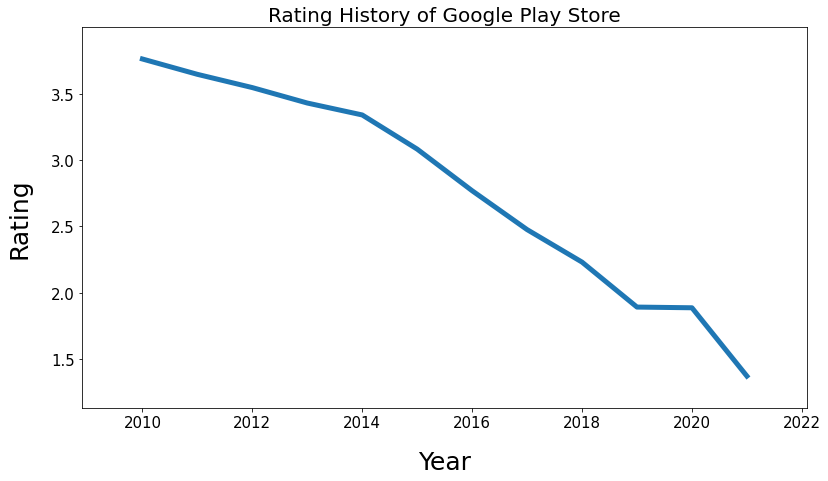

In [34]:
aa = df.groupby('Released Year').mean()['Rating']
# plt.style.use('fivethirtyeight')
x_values = list(aa.index)
y_values = list(aa.values)
# plt.rcParams["font.family"] = "Poppins"
plt.figure(figsize=(13,7))
plt.plot(x_values, y_values, linewidth=5)
plt.title('Rating History of Google Play Store', fontsize=20)
plt.xlabel('Year', fontsize=25, labelpad=20 )
plt.ylabel('Rating', fontsize=25, labelpad=20)
plt.tick_params('both', labelsize=15, labelcolor='black')
plt.margins(x=0.1, y=0.1, tight=True)
plt.savefig('rating_past.jpg', dpi=200)